# Quick IRF check

This is a quick IRF check for https://forge.in2p3.fr/issues/16702

See if it's possible to read the CTA IRFs with the Gammapy classes and make some plots.

## Issues

This is very much work in progress. The following issues are clearly visible:
* possible shift by one bin or half a bin where ENERGY or OFFSET nodes are placed. Evaluation at < 1 deg offset not possible.
* matplotlib plotting issue with extent for imshow is visible in several plots (EDISP and PSF). See https://github.com/gammapy/gammapy/issues/823

## TODO

* extend notebook to illustrate all IRFs across parameter space.
* implement some checks (e.g. on-axis and off-axis responses should be consistent)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import astropy.units as u
from gammapy.scripts import CTAPerf, CTAIrf

## IRFs from Gammapy ROOT -> FITS converter

These are the IRFs obtained from the Gammapy ROOT -> FITS converter

In [2]:
filename = 'CTA-Performance-South-50h_20170119.fits.gz'
cta = CTAPerf.read(filename)

KeyError: "Extension u'ENERGY DISPERSION' not found."

In [3]:
cta.peek()

NameError: name 'cta' is not defined

In [4]:
print(cta.aeff)

NameError: name 'cta' is not defined

## IRFs from ctools ROOT -> FITS converter

These are the IRFs obtained from the ctools ROOT -> FITS converter

In [10]:
# filename = '$GAMMAPY_EXTRA/datasets/cta/perf_prod2/South_50h/irf_file.fits.gz'
filename = 'caldb/data/cta/prod3b/bcf/South_50h/irf_file.fits'
irf = CTAIrf.read(filename)

/home/kingj/Software/miniconda3/envs/headversions/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/kingj/Software/miniconda3/envs/headversions/lib/python2.7/site-packages/matplotlib/axes/_base.py:1404: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  'yscale=%s' % (xscale, yscale))


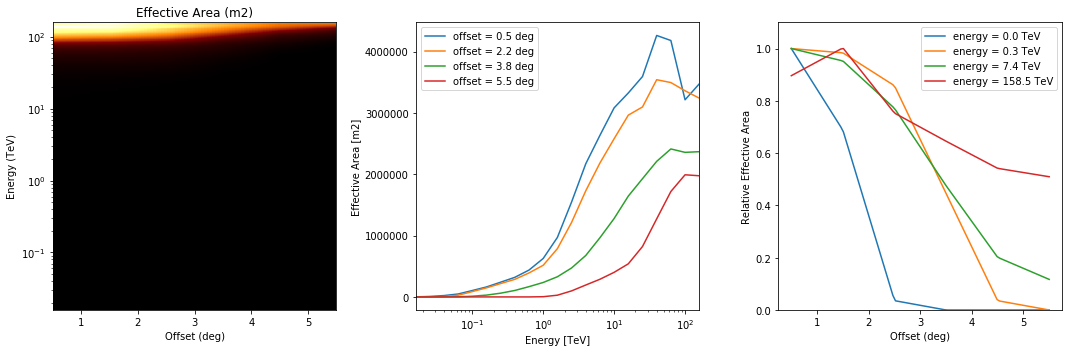

In [11]:
irf.aeff.peek()

In [13]:
print(irf.aeff.offset)
print(irf.aeff.energy)

BinnedDataAxis
Name: offset
Unit: deg
Nodes: 6
Interpolation mode: linear
Lower bounds [ 0.  1.  2.  3.  4.  5.] deg
Upper bounds [ 1.  2.  3.  4.  5.  6.] deg
BinnedDataAxis
Name: energy
Unit: TeV
Nodes: 21
Interpolation mode: log
Lower bounds [  1.25892544e-02   1.99526232e-02   3.16227749e-02   5.01187220e-02
   7.94328228e-02   1.25892535e-01   1.99526235e-01   3.16227764e-01
   5.01187205e-01   7.94328213e-01   1.25892544e+00   1.99526227e+00
   3.16227770e+00   5.01187229e+00   7.94328213e+00   1.25892544e+01
   1.99526234e+01   3.16227760e+01   5.01187248e+01   7.94328232e+01
   1.25892540e+02] TeV
Upper bounds [  1.99526232e-02   3.16227749e-02   5.01187220e-02   7.94328228e-02
   1.25892535e-01   1.99526235e-01   3.16227764e-01   5.01187205e-01
   7.94328213e-01   1.25892544e+00   1.99526227e+00   3.16227770e+00
   5.01187229e+00   7.94328213e+00   1.25892544e+01   1.99526234e+01
   3.16227760e+01   5.01187248e+01   7.94328232e+01   1.25892540e+02
   1.99526230e+02] TeV


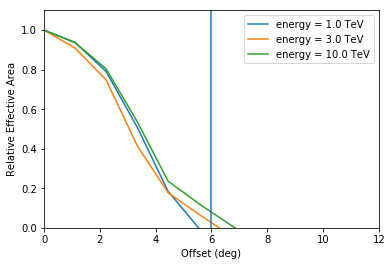

In [25]:
offsets = np.linspace(0, 10, 10) * u.deg
irf.aeff.plot_offset_dependence(energy=[1, 3, 10]*u.TeV, offset=offsets)
plt.xlim(0,12)
plt.axvline(irf.aeff.offset.hi[-1].value)

/home/kingj/Software/gammapy/gammapy/image/models/gauss.py:254: RuntimeWarning: invalid value encountered in true_divide
  self.norms /= self.integral
/home/kingj/Software/miniconda3/envs/headversions/lib/python2.7/site-packages/matplotlib/colors.py:1106: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0
/home/kingj/Software/miniconda3/envs/headversions/lib/python2.7/site-packages/matplotlib/colors.py:1117: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0


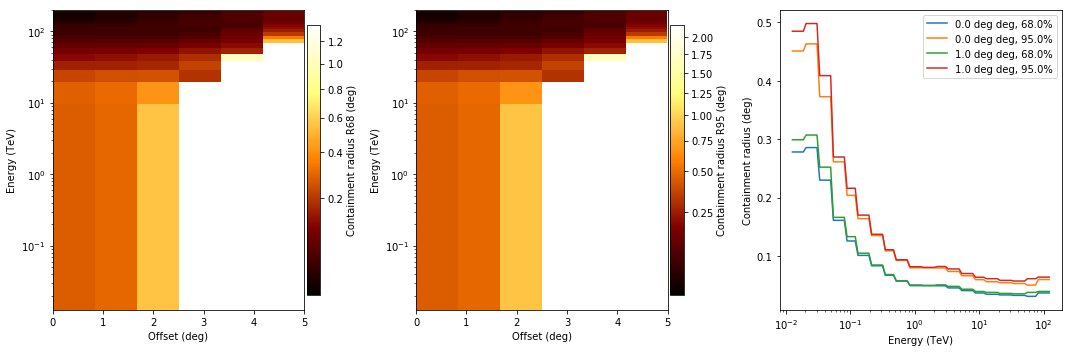

In [26]:
irf.psf.peek()

/home/kingj/Software/miniconda3/envs/headversions/lib/python2.7/site-packages/astropy-1.3-py2.7-linux-x86_64.egg/astropy/units/quantity.py:951: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)
/home/kingj/Software/miniconda3/envs/headversions/lib/python2.7/site-packages/matplotlib/colors.py:1152: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "
/home/kingj/Software/miniconda3/envs/headversions/lib/python2.7/site-packages/matplotlib/axes/_base.py:1404: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  'yscale=%s' % (xscale, yscale))
/home/kingj/Software/miniconda3/envs/headversions/lib/python2.7/site-packages/matplotlib/colors.py:1113: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)


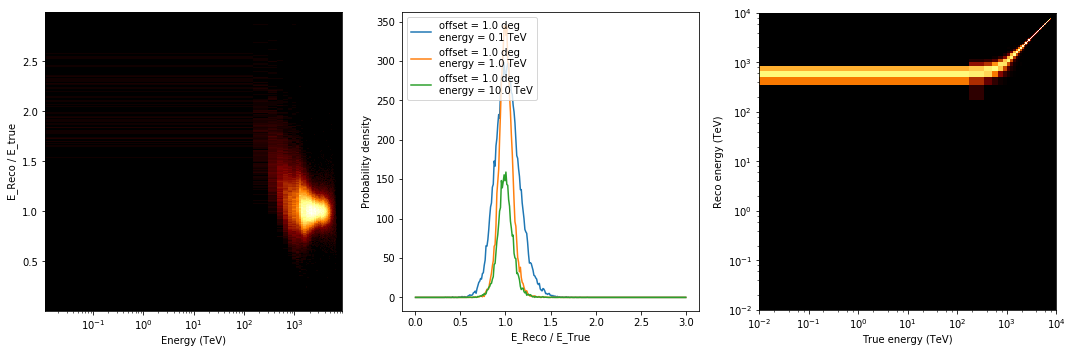

In [27]:
irf.edisp.peek()

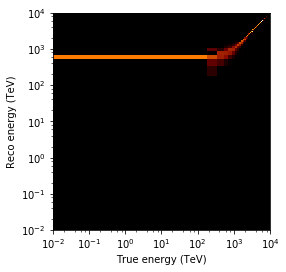

In [31]:
rmf = irf.edisp.to_energy_dispersion(offset=0 * u.deg)
rmf.plot_matrix()

In [ ]:
irf.bkg.plot_image(energy='0.1 TeV')

In [ ]:
coord = [0, 0] * u.deg
irf.bkg.plot_spectrum(coord=coord)
coord = [3, 0] * u.deg
irf.bkg.plot_spectrum(coord=coord)

## Comparison of IRFs

Here's some quick checks on the IRFs.

(for the moment only for AEFF)

In [ ]:
energy = cta.aeff.energy.data

# Evaluating the CTA response at offset < 1 deg currently doesn't work (returns NaNs)
# We need to fix the file or interpolator!
offset = 1.0 * u.deg
aeff_gammapy = cta.aeff.evaluate(energy)
# It looks like evaluate here doesn't give an array with the same length as the input `energy`!?
# As a temp fix, 
aeff_gammapy2 = u.Quantity(list(aeff_gammapy) + [aeff_gammapy[-1]], unit=aeff_gammapy.unit)
aeff_gammapy3 = u.Quantity([aeff_gammapy[0]] + list(aeff_gammapy), unit=aeff_gammapy.unit)
#

aeff_ctools = irf.aeff.evaluate(method='linear', energy=energy, offset=offset)

energy_ctools2 = irf.aeff.energy.data
aeff_ctools2 = irf.aeff.data[:, 0]
# print(energy.shape, aeff_gammapy.shape, aeff_ctools.shape)
# print(aeff_ctools)

fig, ax = plt.subplots()
plt.plot(energy, aeff_gammapy2, label='gammapy2')
plt.plot(energy, aeff_gammapy3, label='gammapy3')
plt.plot(energy, aeff_ctools, label='ctools')
plt.plot(energy_ctools2[:-1], aeff_ctools2, label='ctools2')
plt.plot(energy_ctools2[1:], aeff_ctools2, label='ctools2_v2')
plt.loglog()
plt.legend()

# All the curves are a little different and shifted.
# At the moment I'm

In [ ]:
irf.aeff.data[:, 0]

In [ ]:
# The problem with offset is that we have
print(irf.aeff.offset.data)
# but the FITS file has correct:
# THETA_LO = [0, ..., 5]
# THETA_HI = [1, ..., 6]
# Nodes should be set at [0.5, ..., 5.5]
# and extrapolation should work, i.e. evaluation at 0
# Probably what's needed is to change the class over to NDDataArray?